Confusion Matrix:
[[51  0]
 [11  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        51
           1       1.00      0.31      0.48        16

    accuracy                           0.84        67
   macro avg       0.91      0.66      0.69        67
weighted avg       0.86      0.84      0.80        67

Accuracy: 0.84


C:\Users\jaypa\AppData\Local\Temp\ipykernel_50720\4111352805.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='Greens')


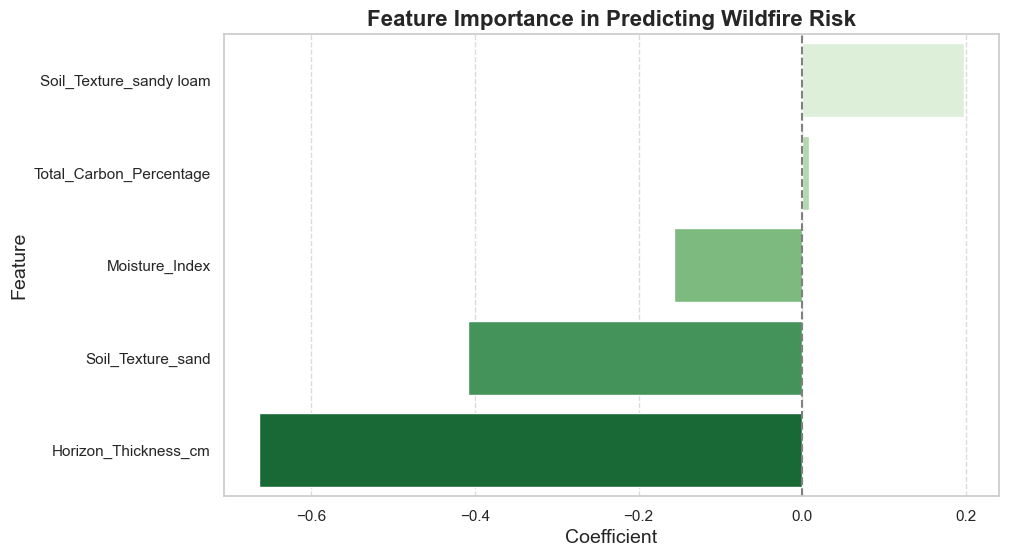

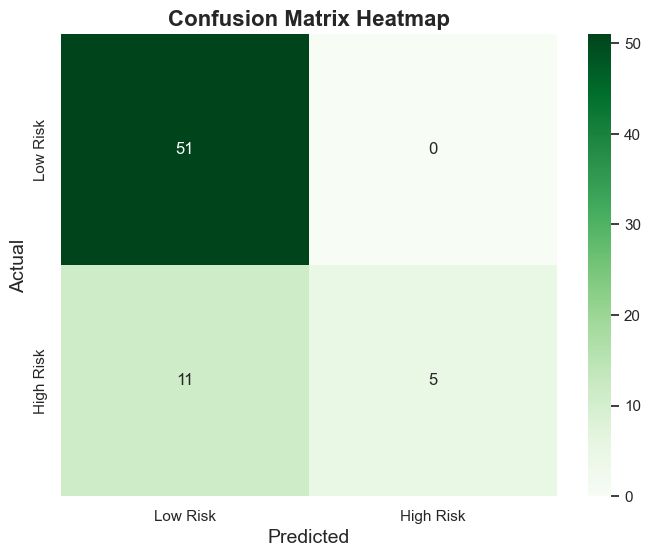

In [7]:
# Import additional libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Step 2: Load the Dataset
data = pd.read_csv('Final_Vegetation_Dataset.csv')

# Step 3: Preprocess the Data
data['High_Wildfire_Risk'] = np.where(data['Soil_pH'] > 6.5, 1, 0)
features = ['Soil_Texture', 'Moisture_Index', 'Horizon_Thickness_cm', 'Total_Carbon_Percentage']
X = data[features]
y = data['High_Wildfire_Risk']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)

# Print the classification report and confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 7: Visualizations

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Feature Importance
coefficients = model.coef_[0]
features_names = X.columns
importance_df = pd.DataFrame({'Feature': features_names, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='Greens')
plt.title('Feature Importance in Predicting Wildfire Risk', fontsize=16, fontweight='bold')
plt.xlabel('Coefficient', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.axvline(0, color='grey', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 2. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.title('Confusion Matrix Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()